In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk import tokenize
import seaborn as sns
#from wordcloud import WordCloud
# Pacote para a metrica
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Pacote Bernoulli
from sklearn.naive_bayes import BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Carregar os dados do IMDB na base de dados do Kaggle
resenha = pd.read_csv("Dados/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
# Retornando as metricas utilizadas
def get_scores(model,X_train,X_val):
    model.fit(X_train,y_train)
    #print(f'Traing score: {model.score(X_train,y_train)}')
    #print(f'Val score:    {model.score(X_val,y_val)}')
    print( f"F1 score:    {f1_score(model.predict(X_val),y_val)}")
    print(f'Precision score: {precision_score(y_val,model.predict(X_val))}')
    print(f'Recall score: {recall_score(y_val,model.predict(X_val))}')
    print(f'accuracy score: {accuracy_score(y_val, model.predict(X_val))}')



In [4]:
# Criar uma coluna, adotando 0(Zero) para sentimentos NEGATIVOS e 1(um) para sentimentos POSITIVOS
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao

In [5]:
X = resenha["text_pt"]
y = resenha["classificacao"]

In [6]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.05 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0534, random_state=42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#bigrama
cv1 = CountVectorizer(ngram_range=(1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_val_cv1  = cv1.transform(X_val)

In [8]:
bnb = BernoulliNB()
get_scores(bnb,X_train_cv1,X_val_cv1)

F1 score:    0.8786885245901639
Precision score: 0.8940783986655546
Recall score: 0.8638195004029009
accuracy score: 0.8820717131474104


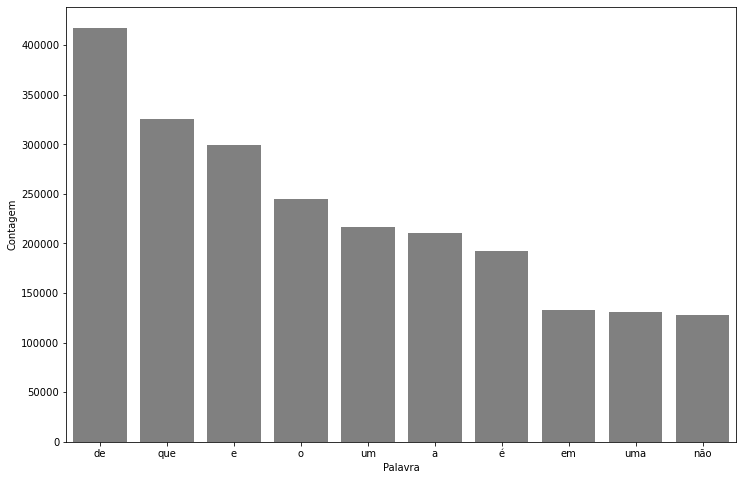

In [9]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(resenha, "text_pt", 10)

In [10]:
# Criar nova coluna do dataset
resenha['tratamento_1'] = resenha['text_pt'].copy()

In [11]:
# Retirada de pontuação
resenha['tratamento_1'] = resenha['tratamento_1'].str.replace('[,.:;!?]+', ' ', regex=True).copy()

In [12]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...


In [13]:
# Criar nova coluna do dataset
resenha['tratamento_2'] = resenha['tratamento_1'].copy()

In [14]:
# Retirada de caracter especial
resenha['tratamento_2'] = resenha['tratamento_1'].str.replace ('[/<>()|\+\-\$%&#@\'\"]+', ' ', regex=True).copy()

In [15]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...


In [16]:
# Criar nova coluna do dataset
resenha['tratamento_3'] = resenha['tratamento_2'].copy()

In [17]:
# Retirar números
resenha['tratamento_3'] = resenha['tratamento_3'].str.replace('[0-9]+', '', regex=True).copy()

In [18]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...


In [19]:
# Criar nova coluna do dataset
resenha['tratamento_4'] = resenha['tratamento_3'].copy()

In [20]:
# Stop words
from nltk import tokenize
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [21]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,"Filmes fotos latão palavra apropriada eles, ve..."


In [22]:
# Criar nova coluna do dataset
resenha['tratamento_5'] = resenha['tratamento_4'].copy()

In [23]:
# Definir as pontuações
from string import punctuation
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [24]:
# Pré-processamento - STOP WORDS - Retirar pontuação

pontuacao_stopwords = pontuacao + palavras_irrelevantes
token_pontuacao = tokenize.WordPunctTokenizer()
frase_processada = list()

In [25]:
# Pré-processamento - STOP WORDS - Retirar acentuação
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_4"]]

resenha["tratamento_5"] = sem_acentos

stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

frase_processada = list()
for opiniao in resenha["tratamento_5"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [26]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latao palavra apropriada verdade ...


In [27]:
# Criar nova coluna do dataset
resenha['tratamento_6'] = resenha['tratamento_5'].copy()

In [28]:
# Stematizar
stemmer = nltk.RSLPStemmer()
frase_processada = list()
for opiniao in resenha["tratamento_5"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_6"] = frase_processada
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_6
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,mais vez sr costn arrum film temp necessari al...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,est exempl motiv maior film aca mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,nem beatl pud escrev music tod gost emb walt h...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous s...


In [29]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_6
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,Mais uma vez o Sr Costner arrumou um filme p...,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,mais vez sr costn arrum film temp necessari al...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,est exempl motiv maior film aca mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,Primeiro de tudo eu odeio esses raps imbecis ...,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,nem beatl pud escrev music tod gost emb walt h...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous s...


In [30]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_6
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,Como a média de votos era muito baixa e o fat...,Como a média de votos era muito baixa e o fat...,Como a média de votos era muito baixa e o fat...,"Como média votos baixa, fato funcionário locad...",Como media votos baixa fato funcionario locado...,com med vot baix fat funcionari loc ach tud be...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo teve algumas reviravoltas infelizes e...,O enredo teve algumas reviravoltas infelizes e...,O enredo teve algumas reviravoltas infelizes e...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,o enred algum reviravolt infeliz inacredita no...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado com a forma como este filme e ...,Estou espantado com a forma como este filme e ...,Estou espantado com a forma como este filme e ...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...,est espant form film maior outr med 5 estrel m...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes do m...,A Christmas Together realmente veio antes do m...,A Christmas Together realmente veio antes do m...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,a christm togeth real vei ant temp cri john de...
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1,O drama romântico da classe trabalhadora do di...,O drama romântico da classe trabalhadora do di...,O drama romântico da classe trabalhadora do di...,O drama romântico classe trabalhadora diretor ...,O drama romantico classe trabalhadora diretor ...,o dram roman cl trabalh dire martin ritt tao i...


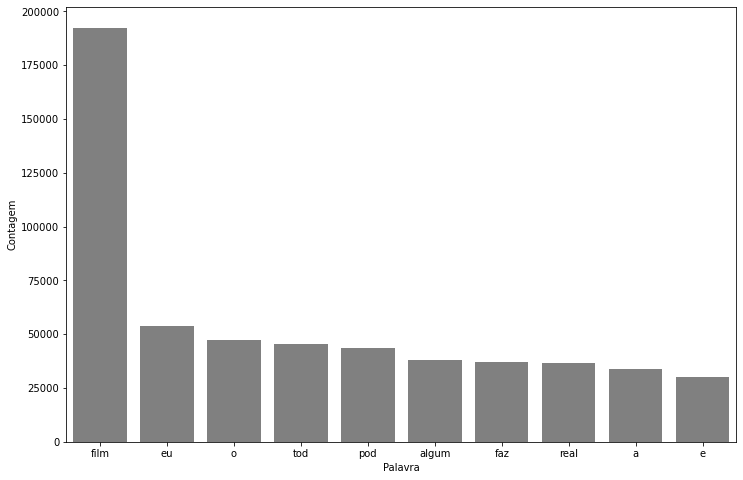

In [31]:
pareto(resenha, "tratamento_6", 10)

In [32]:
X = resenha["tratamento_6"]
y = resenha["classificacao"]

In [33]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.05 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0534, random_state=42)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(ngram_range=(1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_val_cv1  = cv1.transform(X_val)

In [35]:
bnb = BernoulliNB()
get_scores(bnb,X_train_cv1,X_val_cv1)

F1 score:    0.8773819386909694
Precision score: 0.9028132992327366
Recall score: 0.8533440773569702
accuracy score: 0.8820717131474104
